In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [30]:

base = pd.read_csv(r'Amazon Sale Report.csv')
base = base.drop(columns=(["index", "Unnamed: 22"]))
pd.set_option('display.max_columns', None)
base.head(2)

C:\Users\publi\AppData\Local\Temp\ipykernel_22568\3102355911.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv(r'Amazon Sale Report.csv')


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship


In [31]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [32]:
base.columns = base.columns.str.strip()

In [33]:
vendas = base.groupby("Status")["Qty"].sum()
display(vendas)

Status
Cancelled                         5657
Pending                            657
Pending - Waiting for Pick Up      283
Shipped                          78009
Shipped - Damaged                    1
Shipped - Delivered to Buyer     28886
Shipped - Lost in Transit            5
Shipped - Out for Delivery          35
Shipped - Picked Up                977
Shipped - Rejected by Buyer         11
Shipped - Returned to Seller      1970
Shipped - Returning to Seller      150
Shipping                             8
Name: Qty, dtype: int64

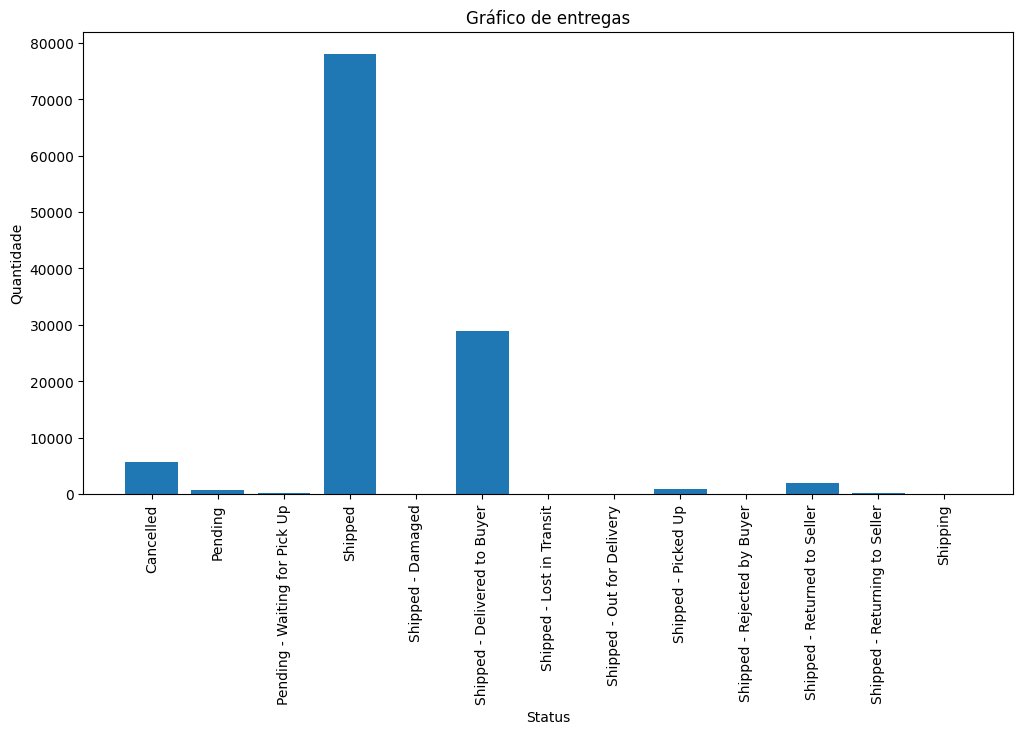

In [34]:


# Preparando os dados
data = base.groupby("Status")["Qty"].sum()

# Criando o gráfico com matplotlib
fig, ax = plt.subplots(figsize=(12, 6))  # Define o tamanho
ax.bar(data.index, data.values)         # Adiciona os dados

# Personalizações (opcional)
ax.set_title("Gráfico de entregas")
ax.set_xlabel("Status")
ax.set_ylabel("Quantidade")
plt.xticks(rotation=90) #rotaciona os valores de x em 90 graus


# Exibindo o gráfico
plt.show()


In [35]:
for coluna in base.columns:
    valores = base[coluna].unique()
    print(coluna)
    print(valores)

Order ID
['405-8078784-5731545' '171-9198151-1101146' '404-0687676-7273146' ...
 '407-9547469-3152358' '402-6184140-0545956' '408-7436540-8728312']
Date
['04-30-22' '04-29-22' '04-28-22' '04-27-22' '04-26-22' '04-25-22'
 '04-24-22' '04-23-22' '04-22-22' '04-21-22' '04-20-22' '04-19-22'
 '04-18-22' '04-17-22' '04-16-22' '04-15-22' '04-14-22' '04-13-22'
 '04-12-22' '04-11-22' '04-10-22' '04-09-22' '04-08-22' '04-07-22'
 '04-06-22' '04-05-22' '04-04-22' '04-03-22' '04-02-22' '04-01-22'
 '03-31-22' '05-31-22' '05-30-22' '05-29-22' '05-28-22' '05-27-22'
 '05-26-22' '05-25-22' '05-24-22' '05-23-22' '05-22-22' '05-21-22'
 '05-20-22' '05-19-22' '05-18-22' '05-17-22' '05-16-22' '05-15-22'
 '05-14-22' '05-13-22' '05-12-22' '05-11-22' '05-10-22' '05-09-22'
 '05-08-22' '05-07-22' '05-06-22' '05-05-22' '05-04-22' '05-03-22'
 '05-02-22' '05-01-22' '06-29-22' '06-28-22' '06-27-22' '06-26-22'
 '06-25-22' '06-24-22' '06-23-22' '06-22-22' '06-21-22' '06-20-22'
 '06-19-22' '06-18-22' '06-17-22' '06-16-22

In [36]:
base.head(2)
categoria = base.groupby("Category")["Amount"].sum()

# Preparando os dados
categoria = base.groupby("Category")["Amount"].sum().sort_values(ascending=False)

display(categoria)

Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Blouse             458408.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64

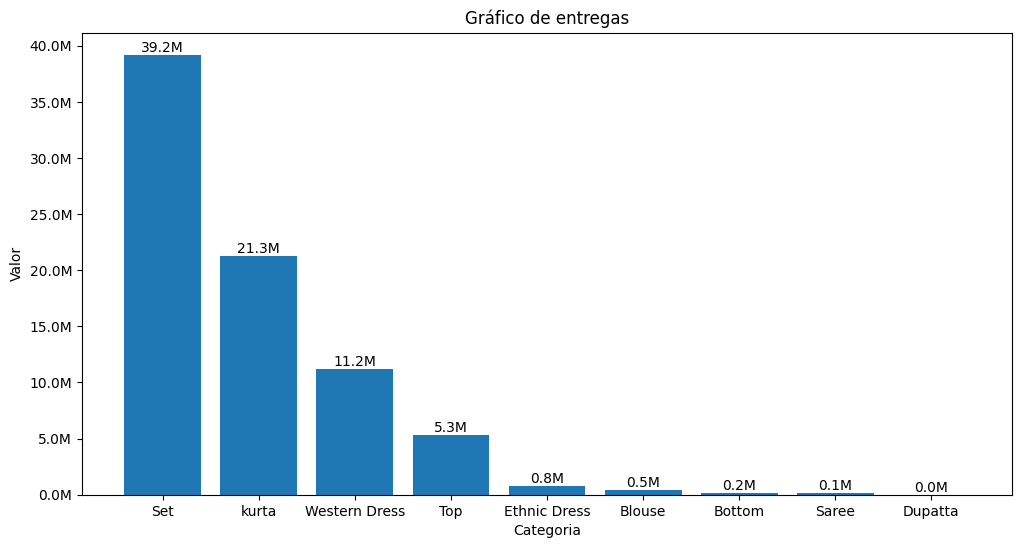

In [37]:

# Criando o gráfico com matplotlib
categoria = base.groupby("Category")["Amount"].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))  # Define o tamanho
bars =  ax.bar(categoria.index, categoria.values)         # Adiciona os dados

# Personalizações (opcional)
ax.set_title("Gráfico de entregas")
ax.set_xlabel("Categoria")
ax.set_ylabel("Valor")

# Formatar o eixo Y para milhares
formatter = FuncFormatter(lambda x, pos: f'{x / 1_000_000:,.1f}M')
ax.yaxis.set_major_formatter(formatter)

# Adicionar os valores no topo das barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Coordenada X (centro da barra)
        height,  # Coordenada Y (altura da barra)
        f'{height / 1_000_000:,.1f}M',  # Valor formatado
        ha='center',  # Centralizar o texto horizontalmente
        va='bottom'   # Posicionar o texto acima da barra
    )

# Exibindo o gráfico
plt.show()

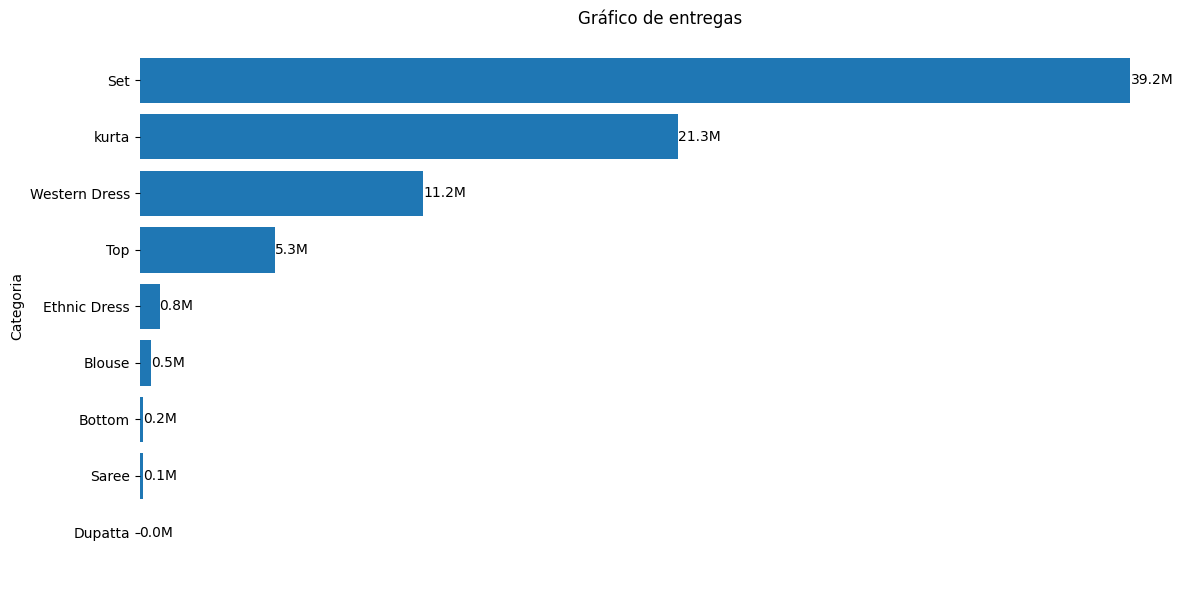

In [38]:
# Criando o gráfico com matplotlib
categoria = base.groupby("Category")["Amount"].sum()
categoria = categoria.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12, 6))  # Define o tamanho
bars = ax.barh(categoria.index, categoria.values)  # Gráfico de barras horizontal

# Personalizações
ax.set_title("Gráfico de entregas")
ax.set_xlabel("Valor")
ax.set_ylabel("Categoria")

# Formatar o eixo X para milhões
formatter = FuncFormatter(lambda x, pos: f'{x / 1_000_000:,.1f}M')
ax.xaxis.set_major_formatter(formatter)

# Adicionar os valores ao lado das barras
for bar in bars:
    width = bar.get_width()
    ax.text(
        width,  # Coordenada X (final da barra)
        bar.get_y() + bar.get_height() / 2,  # Coordenada Y (meio da barra)
        f'{width / 1_000_000:,.1f}M',  # Valor formatado
        ha='left',  # Alinhar o texto à esquerda
        va='center'  # Centralizar o texto verticalmente
    )

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_visible(False) #REtira os valores do eixo x
ax.set_xlabel("Valor")
# Ajustar espaçamento
plt.tight_layout()

# Exibindo o gráfico
plt.show()


In [39]:
base.head(2)
qtd_status = base.groupby("Status")["Qty"].sum()
qtd_status = qtd_status.sort_values(ascending=False)
qtd_status = base.groupby("Status")["Qty"].describe().sort_values(by="count",ascending=False)
display(qtd_status)


,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Shipped,77804.0,1.002635,0.105530,0.0,1.0,1.0,1.0,15.0
Shipped - Delivered to Buyer,28769.0,1.004067,0.081806,0.0,1.0,1.0,1.0,5.0
Cancelled,18332.0,0.308586,0.464983,0.0,0.0,0.0,1.0,2.0
Shipped - Returned to Seller,1953.0,1.008705,0.144666,0.0,1.0,1.0,1.0,4.0
Shipped - Picked Up,973.0,1.004111,0.064018,1.0,1.0,1.0,1.0,2.0
Pending,658.0,0.998480,0.067557,0.0,1.0,1.0,1.0,2.0
Pending - Waiting for Pick Up,281.0,1.007117,0.084214,1.0,1.0,1.0,1.0,2.0
Shipped - Returning to Seller,145.0,1.034483,0.183098,1.0,1.0,1.0,1.0,2.0
Shipped - Out for Delivery,35.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [40]:
total_sem_shipped = base.loc[~base["Status"].isin(["Shipped","Shipped - Delivered to Buyer","Shipped - Picked Up"]), "Qty"].sum()
total_shipped = base.loc[base["Status"].isin(["Shipped","Shipped - Delivered to Buyer","Shipped - Picked Up"]), "Qty"].sum()

print(total_sem_shipped)
print(total_shipped)

8777
107872


In [41]:
base_rejeitados = base[base["Status"].isin(["Damaged","Lost in Transit","Rejected by Buyer","Returning to Seller","Returned to Seller","Cancelled"])]

base_rejeitados.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship


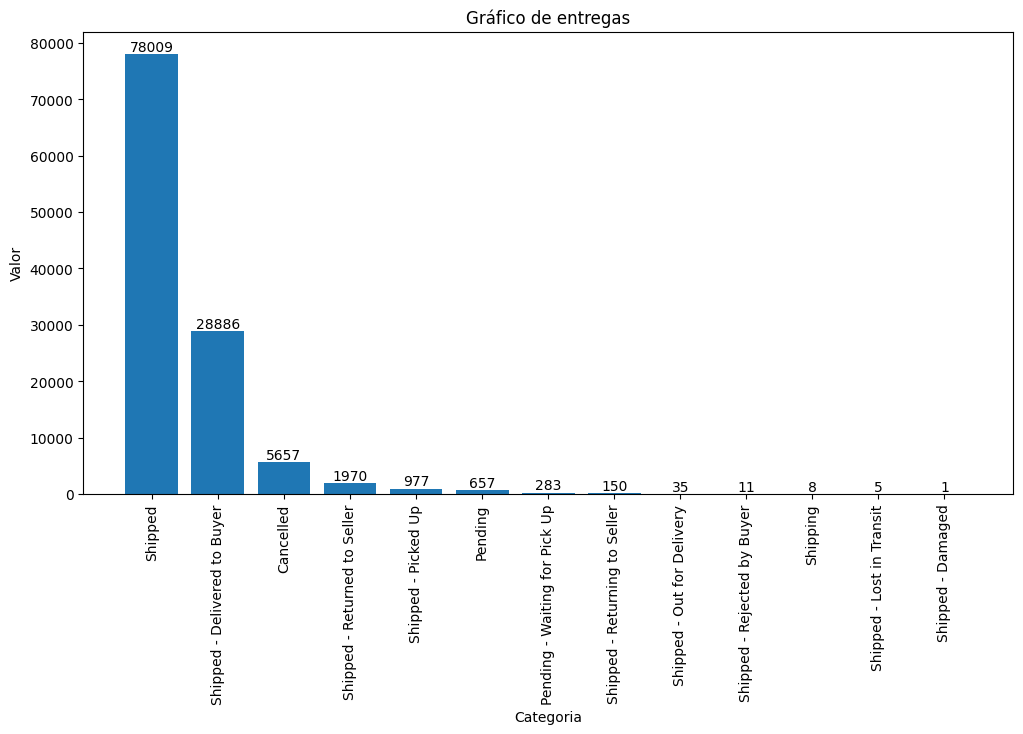

In [42]:
# Criando o gráfico com matplotlib
qtd_status = base.groupby("Status")["Qty"].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))  # Define o tamanho
bars =  ax.bar(qtd_status.index, qtd_status.values)         # Adiciona os dados

# Personalizações (opcional)
ax.set_title("Gráfico de entregas")
ax.set_xlabel("Categoria")
ax.set_ylabel("Valor")



# Adicionar os valores no topo das barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Coordenada X (centro da barra)
        height,  # Coordenada Y (altura da barra)
        f'{height}',  # Valor formatado
        ha='center',  # Centralizar o texto horizontalmente
        va='bottom'   # Posicionar o texto acima da barra
    )

plt.xticks(rotation=90) #rotaciona os valores dae x em 90 graus

# Exibindo o gráfico
plt.show()

In [43]:
total_sem_shipped = base.loc[~base["Status"].isin(["Shipped","Shipped - Delivered to Buyer","Shipped - Picked Up"]), "Qty"].sum()
total_shipped = base.loc[base["Status"].isin(["Shipped","Shipped - Delivered to Buyer","Shipped - Picked Up"]), "Qty"].sum()
print(total_sem_shipped)
print(total_shipped)

8777
107872


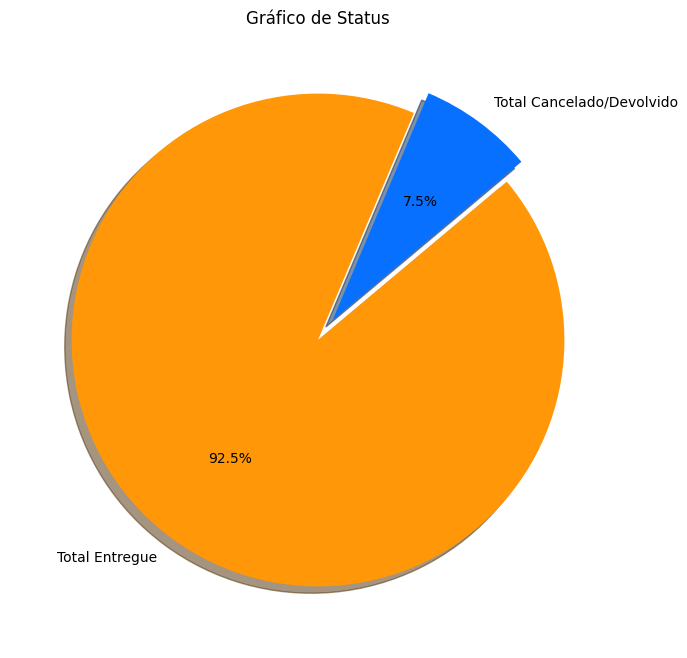

In [57]:
total_cancelado = base.loc[~base["Status"].isin(["Shipped","Shipped - Delivered to Buyer","Shipped - Picked Up"]), "Qty"].sum()
total_shipped = base.loc[base["Status"].isin(["Shipped","Shipped - Delivered to Buyer","Shipped - Picked Up"]), "Qty"].sum()


# Criando o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
explode = (0.2,0)
ax.pie(
    [total_cancelado,total_shipped], 
    labels=["Total Cancelado/Devolvido","Total Entregue"], 
    autopct='%1.1f%%',  # Mostra porcentagens com 1 casa decimal
    startangle=40,      # Começa a partir do topo
    #wedgeprops={'edgecolor': 'black'},  # Adiciona bordas às fatias
    colors=['#0870ff','#FF9708'],
    explode=(0.1,0),
    shadow=True
)


# Personalizações (opcional)
ax.set_title("Gráfico de Status")



# Exibindo o gráfico
plt.show()

In [45]:
estado = base.groupby("ship-state")["Qty"].sum(). sort_values(ascending=False)
estados_Maior_100 = estado[estado>100].count()
estados_Menor_100 = estado[estado<100].count()
print(estados_Maior_100)
print(estados_Menor_100)


33
36


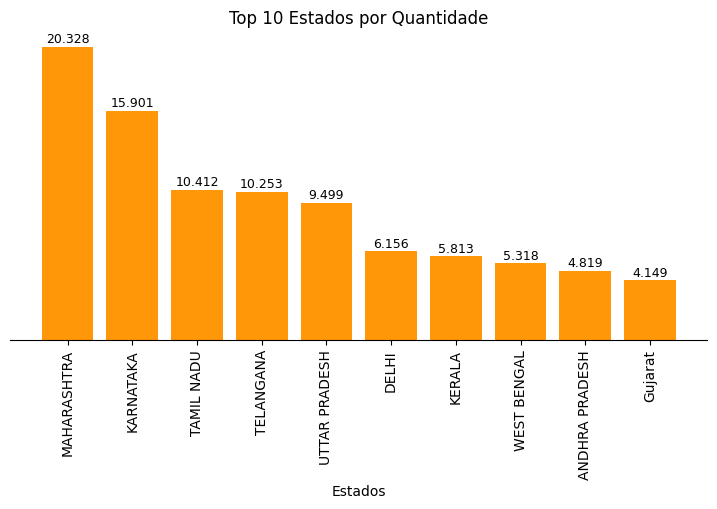

In [46]:
base.head(2)

estado = base.groupby("ship-state")["Qty"].sum(). sort_values(ascending=False)

estado =estado.head(10)

#Ajusta o tamanho do grafico
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

#ax.bar(X,y)
ax.bar(estado.index,estado.values,
       color="#FF9708" # Cor das barras
      )

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,10):
    ax.annotate('{:,.0f}'.format(estado.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (estado.index[i],estado.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+10), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=9, # Tamanho da fonte dos rótulos
                #fontweight='bold', # Espessura da fonte dos rótulos
                #color="#d47b00" # Cor dos rótulos
            )

ax.set_title("Top 10 Estados por Quantidade")  # Título
ax.set_xlabel("Estados")  # Rótulo do eixo X
ax.set_ylabel("Quantidade")  # Rótulo do eixo Y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_visible(False) # Retirando os valores do eixo y
plt.xticks(rotation=90) #rotaciona os valores dae x em 90 graus
plt.show()




In [47]:
total_shipped = base.loc[base["Status"].isin(["Shipped","Shipped - Delivered to Buyer","Shipped - Picked Up"])]
total_shipped.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN


In [48]:
Qtd = total_shipped.groupby(["SKU"])["Qty"].sum().sort_values(ascending=False)
valor = total_shipped.groupby("SKU")["Amount"].sum().sort_values(ascending=False)

display(valor.head(10), Qtd.head(10))

SKU
J0230-SKD-M        480913.0
JNE3797-KR-L       439562.0
J0230-SKD-S        436032.0
JNE3797-KR-M       376370.0
JNE3797-KR-S       339192.0
JNE3797-KR-XL      277177.0
J0230-SKD-L        274189.0
SET268-KR-NP-XL    260156.0
JNE3797-KR-XS      257588.0
JNE3797-KR-XXXL    242737.0
Name: Amount, dtype: float64

SKU
JNE3797-KR-L       605
JNE3797-KR-M       515
JNE3797-KR-S       461
JNE3405-KR-L       450
J0230-SKD-M        433
J0230-SKD-S        390
JNE3405-KR-S       375
JNE3797-KR-XL      372
JNE3797-KR-XS      348
SET268-KR-NP-XL    344
Name: Qty, dtype: int64

In [49]:
# Encontrar SKUs iguais e diferentes
skus_iguais = set(valor.head(10).index).intersection(Qtd.head(10).index)
skus_diferentes = set(valor.head(10).index).symmetric_difference(Qtd.head(10).index)

# Exibir os resultados
print(f"SKUs iguais entre os 10 maiores em 'valor' e 'Qtd' ({len(skus_iguais)} no total):")
if skus_iguais:
    print(skus_iguais)
    print(len(skus_iguais))
else:
    print("Nenhum SKU igual encontrado.")

print(f"\nSKUs diferentes entre os 10 maiores em 'valor' e 'Qtd' ({len(skus_diferentes)} no total):")
if skus_diferentes:
    print(skus_diferentes)
    print(len(skus_diferentes))
else:
    print("Nenhum SKU diferente encontrado.")


SKUs iguais entre os 10 maiores em 'valor' e 'Qtd' (8 no total):
{'JNE3797-KR-M', 'JNE3797-KR-L', 'JNE3797-KR-S', 'JNE3797-KR-XS', 'JNE3797-KR-XL', 'J0230-SKD-M', 'J0230-SKD-S', 'SET268-KR-NP-XL'}
8

SKUs diferentes entre os 10 maiores em 'valor' e 'Qtd' (4 no total):
{'JNE3797-KR-XXXL', 'JNE3405-KR-L', 'JNE3405-KR-S', 'J0230-SKD-L'}
4


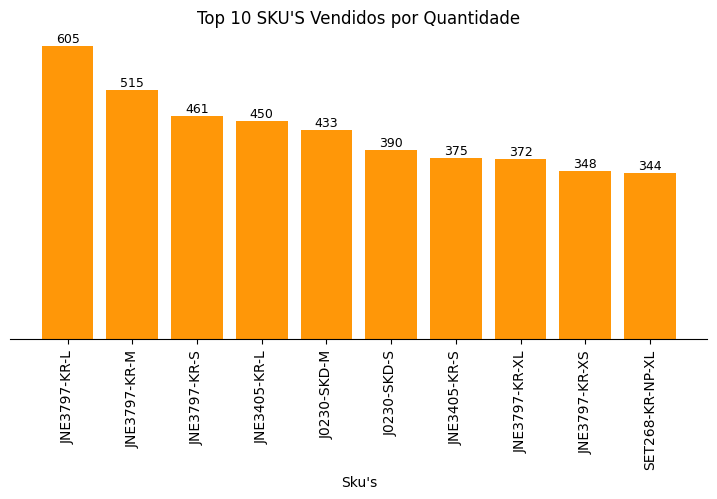

In [53]:
Qtd = total_shipped.groupby(["SKU"])["Qty"].sum().sort_values(ascending=False)
Qtd = Qtd.head(10)


#Ajusta o tamanho do grafico
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

#ax.bar(X,y)
ax.bar(Qtd.index,Qtd.values,
       color="#FF9708" # Cor das barras
      )

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,10):
    ax.annotate('{:,.0f}'.format(Qtd.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (Qtd.index[i],Qtd.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+10), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=9, # Tamanho da fonte dos rótulos
                #fontweight='bold', # Espessura da fonte dos rótulos
                #color="#d47b00" # Cor dos rótulos
            )

ax.set_title("Top 10 SKU'S Vendidos por Quantidade")  # Título
ax.set_xlabel("Sku's")  # Rótulo do eixo X


ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_visible(False) # Retirando os valores do eixo y
plt.xticks(rotation=90) #rotaciona os valores dae x em 90 graus
plt.show()


In [51]:
# Criando o gráfico com matplotlib
Mais_Vendidos_valor = total_shipped.groupby("SKU")["Amount"].sum().sort_values(ascending=False)
Mais_Vendidos_valor = Mais_Vendidos_valor.head(10)
display(Mais_Vendidos_valor	)

SKU
J0230-SKD-M        480913.0
JNE3797-KR-L       439562.0
J0230-SKD-S        436032.0
JNE3797-KR-M       376370.0
JNE3797-KR-S       339192.0
JNE3797-KR-XL      277177.0
J0230-SKD-L        274189.0
SET268-KR-NP-XL    260156.0
JNE3797-KR-XS      257588.0
JNE3797-KR-XXXL    242737.0
Name: Amount, dtype: float64

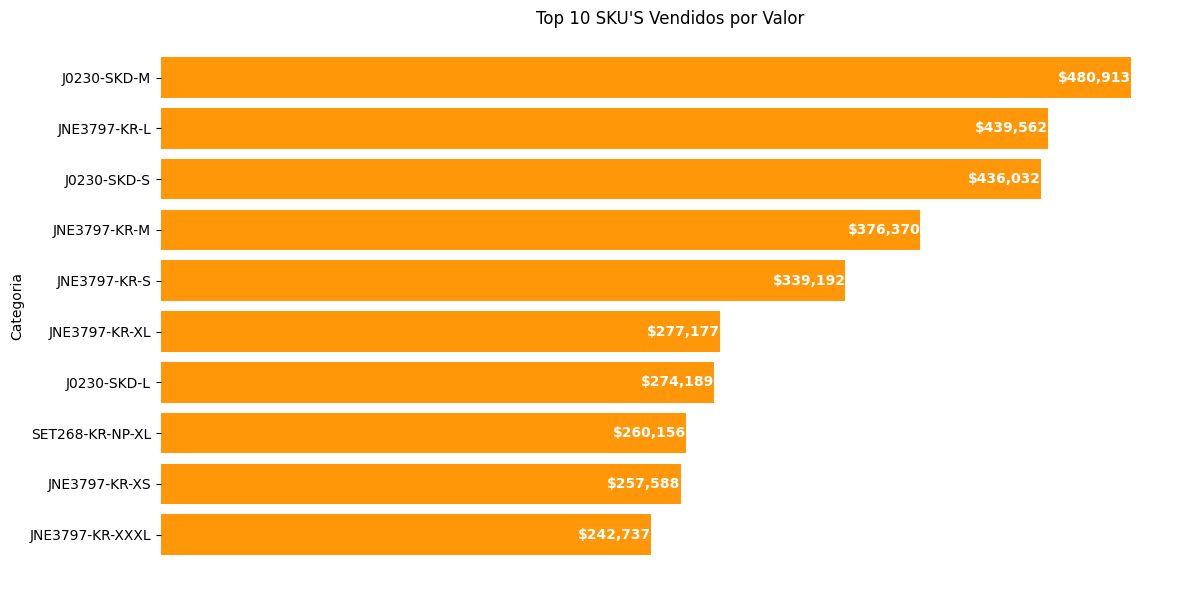

In [55]:
# Criando o gráfico com matplotlib
MaisVendidos_valor = total_shipped.groupby("SKU")["Amount"].sum().sort_values(ascending=False)
MaisVendidos_valor = MaisVendidos_valor.head(10).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12, 6))  # Define o tamanho
bars = ax.barh(MaisVendidos_valor.index, MaisVendidos_valor.values,color="#FF9708") # Cor das barras)  # Gráfico de barras horizontal

# Personalizações
ax.set_title("Top 10 SKU'S Vendidos por Valor")
ax.set_ylabel("Categoria")



# Adicionar os valores ao lado das barras
for bar in bars:
    width = bar.get_width()
    ax.text(
        width-15,  # Coordenada X (final da barra)
        bar.get_y() + bar.get_height() / 2,  # Coordenada Y (meio da barra)
        f'${width:,.0f}',  # Valor formatado
        ha='right',  # Alinhar o texto à esquerda
        va='center', # Centralizar o texto verticalmente
        color  ="White",
        fontsize=10, 
        fontweight='bold'
    )

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_visible(False) #REtira os valores do eixo x
ax.set_xlabel("Valor")
# Ajustar espaçamento
plt.tight_layout()

# Exibindo o gráfico
plt.show()